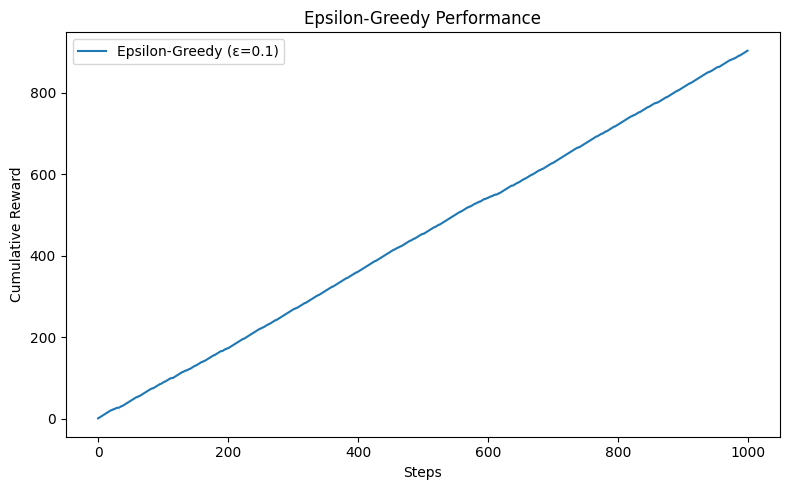

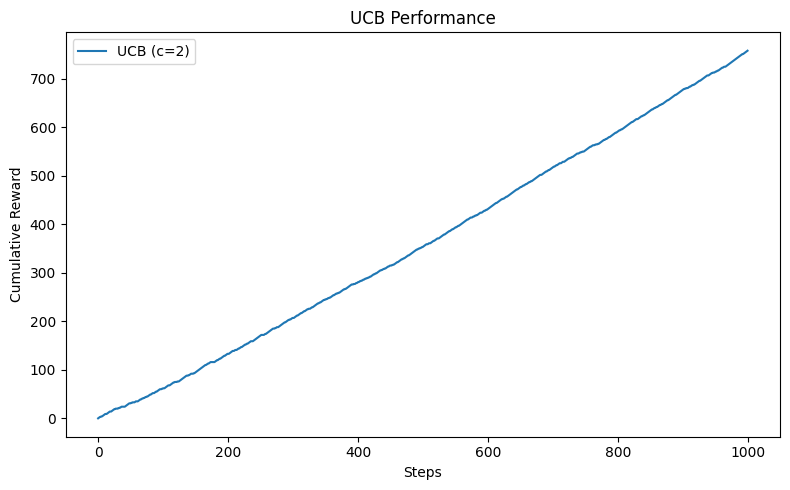

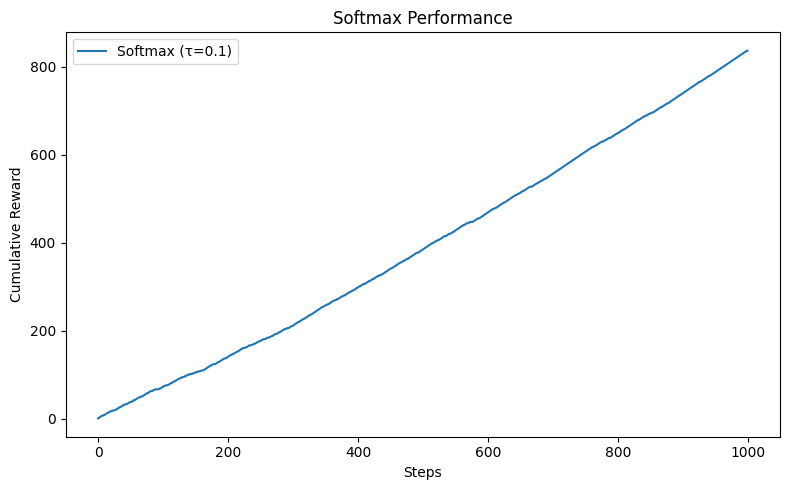

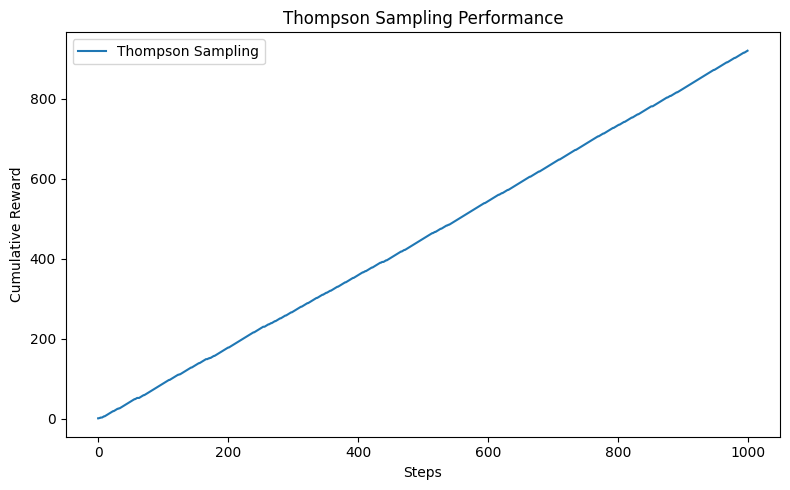

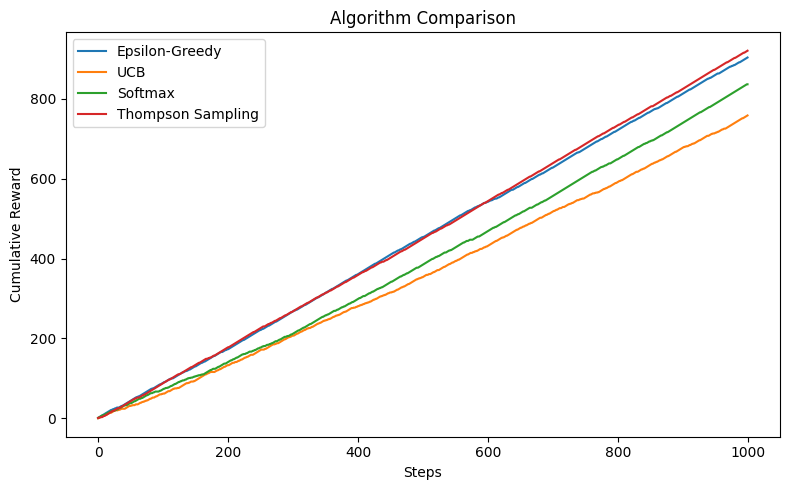

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Simulation parameters
np.random.seed(42)
n_arms = 10
n_steps = 1000
true_means = np.random.rand(n_arms)

# 1. Epsilon-Greedy
# Formula:
#   Q_{t+1}(a) = Q_t(a) + \frac{1}{N_t(a) + 1}(R_t - Q_t(a))
#   a_t = \begin{cases}\text{random}, & \text{w.p. }\epsilon\\\arg\max_a Q_t(a), & \text{w.p. }1-\epsilon\end{cases}
def run_epsilon_greedy(epsilon):
    Q = np.zeros(n_arms)
    N = np.zeros(n_arms)
    rewards = np.zeros(n_steps)
    for t in range(n_steps):
        if np.random.rand() < epsilon:
            a = np.random.randint(n_arms)
        else:
            a = np.argmax(Q)
        r = np.random.rand() < true_means[a]
        N[a] += 1
        Q[a] += (r - Q[a]) / N[a]
        rewards[t] = r
    return np.cumsum(rewards)

# 2. Upper Confidence Bound (UCB)
# Formula:
#   a_t = \arg\max_a \Bigl[Q_t(a) + c \sqrt{\frac{\ln t}{N_t(a) + 1}}\Bigr]
def run_ucb(c):
    Q = np.zeros(n_arms)
    N = np.zeros(n_arms)
    rewards = np.zeros(n_steps)
    for t in range(1, n_steps + 1):
        ucb = Q + c * np.sqrt(np.log(t) / (N + 1e-5))
        a = np.argmax(ucb)
        r = np.random.rand() < true_means[a]
        N[a] += 1
        Q[a] += (r - Q[a]) / N[a]
        rewards[t - 1] = r
    return np.cumsum(rewards)

# 3. Softmax (Boltzmann Exploration)
# Formula:
#   P(a_t = a) = \frac{\exp(Q_t(a)/\tau)}{\sum_b \exp(Q_t(b)/\tau)}
def run_softmax(tau):
    Q = np.zeros(n_arms)
    N = np.zeros(n_arms)
    rewards = np.zeros(n_steps)
    for t in range(n_steps):
        exp_Q = np.exp(Q / tau)
        probs = exp_Q / np.sum(exp_Q)
        a = np.random.choice(n_arms, p=probs)
        r = np.random.rand() < true_means[a]
        N[a] += 1
        Q[a] += (r - Q[a]) / N[a]
        rewards[t] = r
    return np.cumsum(rewards)

# 4. Thompson Sampling
# Formula (Bernoulli):
#   \alpha_a,\beta_a \sim \text{posterior};\quad\theta_a \sim \text{Beta}(\alpha_a,\beta_a);\quad a_t = \arg\max_a \theta_a
def run_thompson():
    alpha = np.ones(n_arms)
    beta_params = np.ones(n_arms)
    rewards = np.zeros(n_steps)
    for t in range(n_steps):
        samples = np.random.beta(alpha, beta_params)
        a = np.argmax(samples)
        r = np.random.rand() < true_means[a]
        alpha[a] += r
        beta_params[a] += (1 - r)
        rewards[t] = r
    return np.cumsum(rewards)

# Plotting helper
def plot_results(cum_rewards, labels, title):
    plt.figure(figsize=(8,5))
    for cr, label in zip(cum_rewards, labels):
        plt.plot(cr, label=label)
    plt.xlabel('Steps')
    plt.ylabel('Cumulative Reward')
    plt.title(title)
    plt.legend()
    plt.tight_layout()

# Main execution
def main():
    eps = 0.1  # \epsilon for Epsilon-Greedy
    c = 2      # confidence level for UCB
    tau = 0.1  # temperature for Softmax

    cr_eps = run_epsilon_greedy(eps)
    cr_ucb = run_ucb(c)
    cr_soft = run_softmax(tau)
    cr_ts = run_thompson()

    # Individual performance plots
    plot_results([cr_eps], [f"Epsilon-Greedy (ε={eps})"], "Epsilon-Greedy Performance")
    plt.show()

    plot_results([cr_ucb], [f"UCB (c={c})"], "UCB Performance")
    plt.show()

    plot_results([cr_soft], [f"Softmax (τ={tau})"], "Softmax Performance")
    plt.show()

    plot_results([cr_ts], ["Thompson Sampling"], "Thompson Sampling Performance")
    plt.show()

    # Summary comparison
    plot_results(
        [cr_eps, cr_ucb, cr_soft, cr_ts],
        ["Epsilon-Greedy", "UCB", "Softmax", "Thompson Sampling"],
        "Algorithm Comparison"
    )
    plt.show()

if __name__ == "__main__":
    main()
